In [ ]:
# Mount Google Drive
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Specify the path to your file
file_path = '/content/drive/MyDrive/colabNotebooks/NFLX.csv'


Mounted at /content/drive


In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np


[*********************100%%**********************]  1 of 1 completed


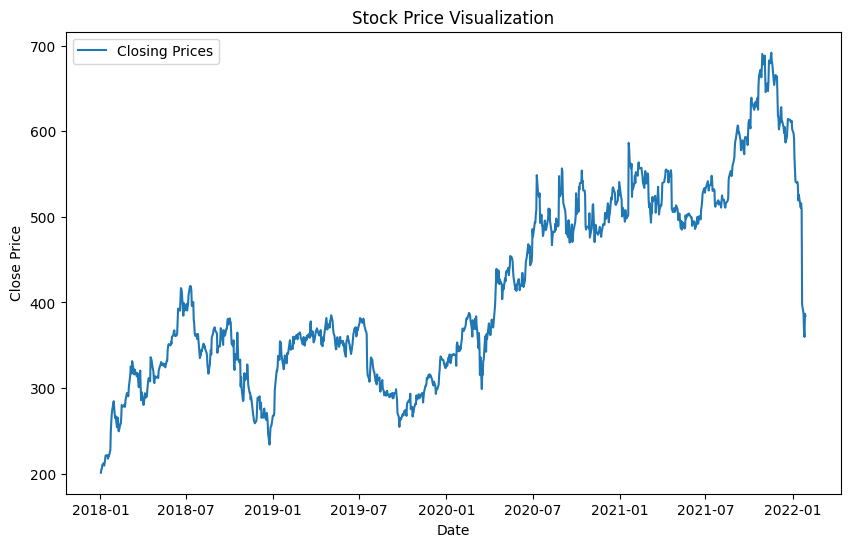

[*********************100%%**********************]  1 of 1 completed


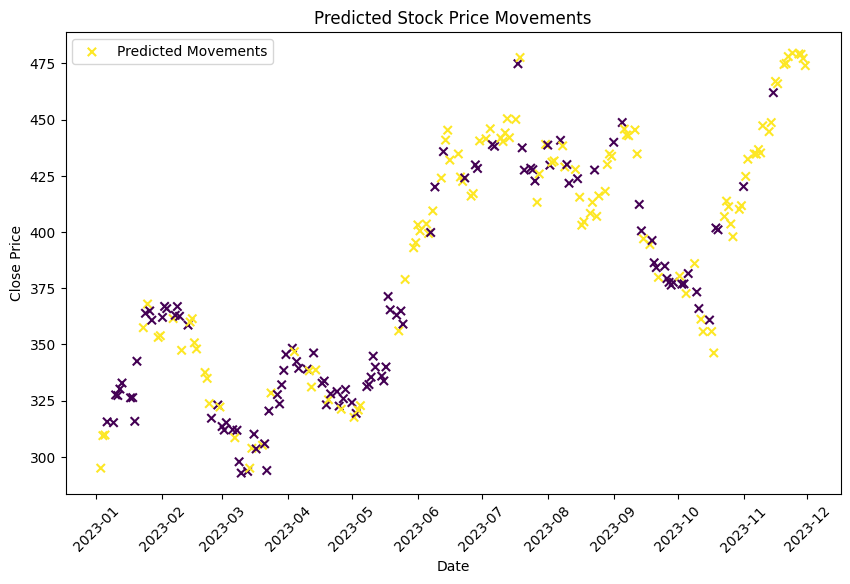

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

class StockPrediction:
    def __init__(self, stock_symbol, start_date, end_date):
        self.stock_symbol = stock_symbol
        self.start_date = start_date
        self.end_date = end_date

    def download_data(self):
        return yf.download(self.stock_symbol, start=self.start_date, end=self.end_date)

    def visualize_data(self, data):
        # Simple example: Plotting the closing prices
        plt.figure(figsize=(10, 6))
        plt.plot(data['Close'], label='Closing Prices')
        plt.title('Stock Price Visualization')
        plt.xlabel('Date')
        plt.ylabel('Close Price')
        plt.legend()
        plt.show()

    def split_data(self, data):
        # Simple example: Splitting data into training and testing sets
        train_size = int(len(data) * 0.8)
        train_data, test_data = data[:train_size], data[train_size:]
        return train_data, test_data

    def preprocess_data(self, data):
        # Add a 'Movement' column based on the price change
        data['Movement'] = (data['Close'].shift(-1) > data['Close']).astype(int)
        # Drop rows with NaN values (last row)
        data = data.dropna()
        return data

    def train_model(self, features, labels):
        scaler = StandardScaler()
        features_scaled = scaler.fit_transform(features)

        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(features_scaled, labels)

        return model, scaler

    def predict(self, model, scaler, new_data):
        new_features = new_data[['Open', 'Close', 'Volume']]
        new_features_scaled = scaler.transform(new_features)

        future_predictions = model.predict(new_features_scaled)

        return future_predictions

def plot_predictions(actual_data, predicted_data):
    plt.figure(figsize=(10, 6))

    # Plot predicted movements
    predicted_dates = actual_data.index[-len(predicted_data):]
    plt.scatter(predicted_dates, actual_data['Close'].iloc[-len(predicted_data):], c=predicted_data, cmap='viridis', label='Predicted Movements', marker='x')

    plt.title('Predicted Stock Price Movements')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.xticks(rotation=45)

    plt.legend()
    plt.show()

# Example usage
if __name__ == "__main__":
    # Define stock parameters
    ticker = 'NFLX'
    start_date = '2018-01-01'
    end_date = '2022-01-31'

    # Instantiate the StockPrediction class
    stock_predictor = StockPrediction(stock_symbol=ticker, start_date=start_date, end_date=end_date)

    # Download, visualize, split, and preprocess data
    data = stock_predictor.download_data()
    stock_predictor.visualize_data(data)
    train_data, test_data = stock_predictor.split_data(data)
    preprocessed_data = stock_predictor.preprocess_data(data)

    # Define features and labels
    features = preprocessed_data[['Open', 'Close', 'Volume']]
    labels = preprocessed_data['Movement']

    # Train the model
    trained_model, trained_scaler = stock_predictor.train_model(features, labels)

    # Fetch future data for prediction
    future_start_date = '2023-01-01'
    future_end_date = '2023-12-01'
    future_data = yf.download(ticker, start=future_start_date, end=future_end_date)

    # Make predictions on future data
    future_predictions = stock_predictor.predict(trained_model, trained_scaler, future_data)

    # Plot the predicted movements
    plot_predictions(future_data, future_predictions)


[*********************100%%**********************]  1 of 1 completed


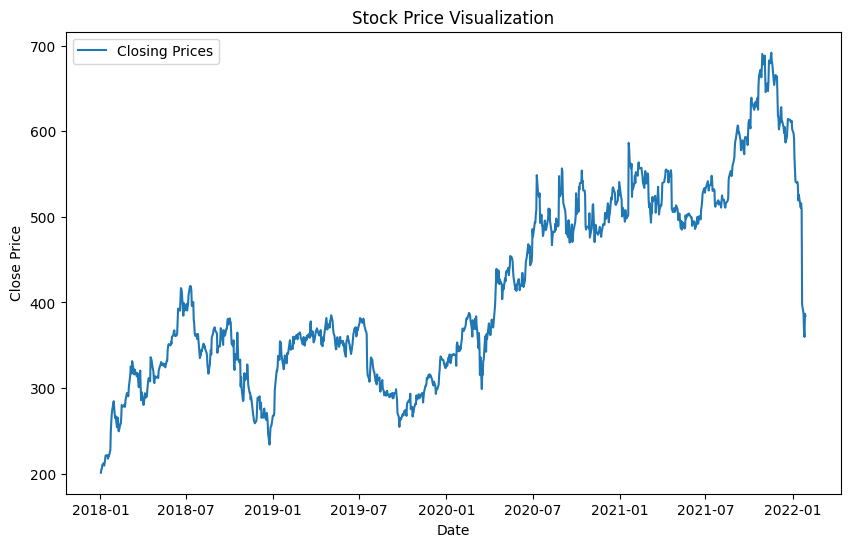

[*********************100%%**********************]  1 of 1 completed


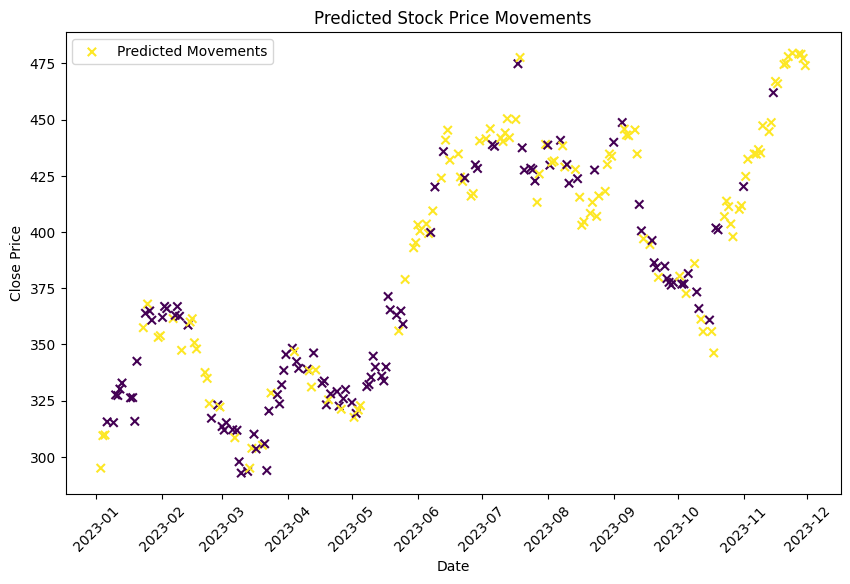

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

class StockPrediction:
    def __init__(self, stock_symbol, start_date, end_date):
        self.stock_symbol = stock_symbol
        self.start_date = start_date
        self.end_date = end_date

    def download_data(self):
        return yf.download(self.stock_symbol, start=self.start_date, end=self.end_date)

    def visualize_data(self, data):
        # Simple example: Plotting the closing prices
        plt.figure(figsize=(10, 6))
        plt.plot(data['Close'], label='Closing Prices')
        plt.title('Stock Price Visualization')
        plt.xlabel('Date')
        plt.ylabel('Close Price')
        plt.legend()
        plt.show()

    def split_data(self, data):
        # Simple example: Splitting data into training and testing sets
        train_size = int(len(data) * 0.8)
        train_data, test_data = data[:train_size], data[train_size:]
        return train_data, test_data

    def preprocess_data(self, data):
        # Add a 'Movement' column based on the price change
        data['Movement'] = (data['Close'].shift(-1) > data['Close']).astype(int)
        # Drop rows with NaN values (last row)
        data = data.dropna()
        return data

    def train_model(self, features, labels):
        scaler = StandardScaler()
        features_scaled = scaler.fit_transform(features)

        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(features_scaled, labels)

        return model, scaler

    def predict(self, model, scaler, new_data):
        new_features = new_data[['Open', 'Close', 'Volume']]
        new_features_scaled = scaler.transform(new_features)

        future_predictions = model.predict(new_features_scaled)

        return future_predictions

def plot_predictions(actual_data, predicted_data):
    plt.figure(figsize=(10, 6))

    # Plot predicted movements
    predicted_dates = actual_data.index[-len(predicted_data):]
    plt.scatter(predicted_dates, actual_data['Close'].iloc[-len(predicted_data):], c=predicted_data, cmap='viridis', label='Predicted Movements', marker='x')

    plt.title('Predicted Stock Price Movements')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.xticks(rotation=45)

    plt.legend()
    plt.show()

# Example usage
if __name__ == "__main__":
    # Define stock parameters
    ticker = 'NFLX'
    start_date = '2018-01-01'
    end_date = '2022-01-31'

    # Instantiate the StockPrediction class
    stock_predictor = StockPrediction(stock_symbol=ticker, start_date=start_date, end_date=end_date)

    # Download, visualize, split, and preprocess data
    data = stock_predictor.download_data()
    stock_predictor.visualize_data(data)
    train_data, test_data = stock_predictor.split_data(data)
    preprocessed_data = stock_predictor.preprocess_data(data)

    # Define features and labels
    features = preprocessed_data[['Open', 'Close', 'Volume']]
    labels = preprocessed_data['Movement']

    # Train the model
    trained_model, trained_scaler = stock_predictor.train_model(features, labels)

    # Fetch future data for prediction
    future_start_date = '2023-01-01'
    future_end_date = '2023-12-01'
    future_data = yf.download(ticker, start=future_start_date, end=future_end_date)

    # Make predictions on future data
    future_predictions = stock_predictor.predict(trained_model, trained_scaler, future_data)

    # Plot the predicted movements
    plot_predictions(future_data, future_predictions)
